In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
key_metrics_community_1_df = pd.read_csv('results/backtest_results/key_metrics_community_1.csv')
key_metrics_community_2_df = pd.read_csv('results/backtest_results/key_metrics_community_2.csv')

#Concat community 1 and community 2 dataframes

key_metrics_merged_df = pd.concat([key_metrics_community_1_df, key_metrics_community_2_df], axis=0)
key_metrics_merged_df.reset_index(drop=True, inplace=True)



In [9]:
#Sort key_metrics_merged_df by Total Return in descending order
#key_metrics_merged_df.sort_values(by='Total return (%)', ascending=False, inplace=True)

#Allow full display of the dataframe
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [10]:
key_metrics_merged_df

,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Mean Absolute Percent Delta Beta (%),Beta series returns std (%),Average S1 trade returns (%),Average S2 trade returns (%)
0,0,EGLDUSDT_2024_5m ~ SEIUSDT_2024_5m,-21.660009,-0.049140,40.249726,122,50.819672,432.049180,3.804728e+01,649.565611,79.398861,0.062149,0.447067
1,0,ATOMUSDT_2024_5m ~ CRVUSDT_2024_5m,-19.461046,-0.050013,33.668677,105,49.523810,449.190476,9.792938e+00,598.858063,456.698800,0.452526,-0.070664
2,0,HBARUSDT_2024_5m ~ GRTUSDT_2024_5m,-29.918300,-0.048496,52.248046,116,59.482759,411.681034,2.041727e-01,87.772730,73.444527,0.904631,0.202553
3,0,IOTAUSDT_2024_5m ~ XTZUSDT_2024_5m,12.442100,0.050195,16.365735,119,57.983193,394.117647,2.156020e-01,91.400999,918.743259,-0.071609,0.084184
4,0,XTZUSDT_2024_5m ~ SANDUSDT_2024_5m,35.183622,0.244260,11.460668,121,72.727273,386.735537,1.514903e+00,62.038757,45.668675,0.322982,0.123132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,LTCUSDT_2024_5m ~ MKRUSDT_2024_5m,11.392324,0.035337,19.942892,126,68.253968,412.738095,9.458661e-03,291.306272,7077.408552,0.312800,0.151625
92,0,NEXOUSDT_2024_5m ~ BTCUSDT_2024_5m,97.367068,0.363456,4.881089,136,73.529412,278.014706,2.171809e-05,116.234374,90.762860,0.245495,0.213949
93,0,SHIBUSDT_2024_5m ~ LTCUSDT_2024_5m,2.519668,0.003800,48.475647,130,65.384615,391.461538,2.568786e-07,93.762540,214.359802,0.316489,0.063250
94,0,BCHUSDT_2024_5m ~ MKRUSDT_2024_5m,4.187982,0.009022,27.138452,125,68.800000,387.000000,5.012612e-02,353.583228,119.760743,0.069303,-0.015250


/var/folders/v0/xxx_2wqx4qsc_858pvgmg3_m0000gp/T/ipykernel_52714/3349097159.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


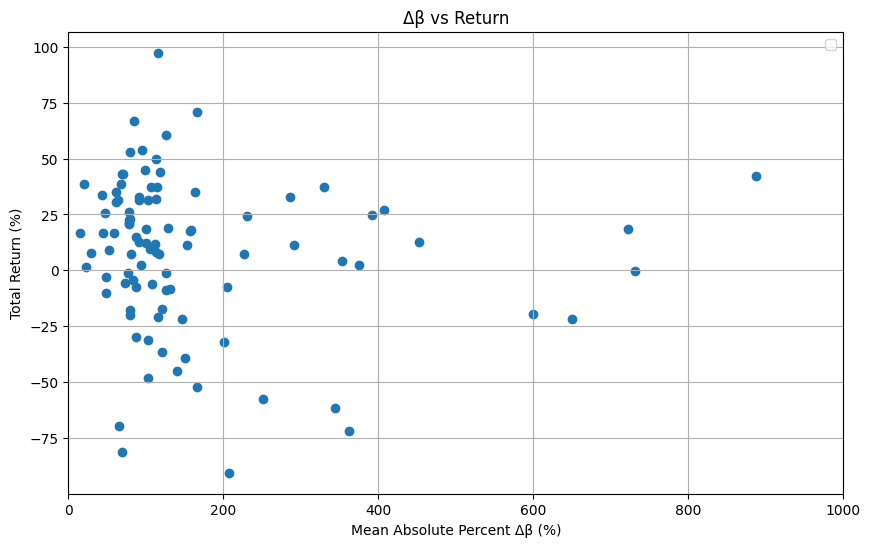

In [11]:
#Create scatter plot of Mean Absolute Percent Delta Beta (%) vs Total Return (%)
plt.figure(figsize=(10, 6))
plt.scatter(key_metrics_merged_df['Mean Absolute Percent Delta Beta (%)'], key_metrics_merged_df['Total return (%)'])

#Add x cut off at 1000
plt.xlim(0, 1000)

# plt.axvline(150, color='red', linestyle='--', label='Δβ = 50 %')
# plt.axhline(20, color='green', linestyle='--', label='Return = 20 %')
plt.xlabel('Mean Absolute Percent Δβ (%)')
plt.ylabel('Total Return (%)')
plt.title('Δβ vs Return')
plt.legend(loc='upper right')
plt.grid(True)

In [12]:
mask = (key_metrics_merged_df['Mean Absolute Percent Delta Beta (%)'] > 50) & \
       (key_metrics_merged_df['Total return (%)'] > 20)
key_metrics_merged_df[mask]

,Unnamed: 0,Pair,Total return (%),Sharpe ratio,Max drawdown (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Mean Absolute Percent Delta Beta (%),Beta series returns std (%),Average S1 trade returns (%),Average S2 trade returns (%)
4,0,XTZUSDT_2024_5m ~ SANDUSDT_2024_5m,35.183622,0.244260,11.460668,121,72.727273,386.735537,1.514903,62.038757,45.668675,0.322982,0.123132
11,0,IOTAUSDT_2024_5m ~ CRVUSDT_2024_5m,22.781141,0.105635,8.984444,116,62.068966,395.387931,0.380682,79.744877,129.834826,0.380011,0.308803
15,0,IOTAUSDT_2024_5m ~ MANAUSDT_2024_5m,31.507574,0.160683,9.236115,131,70.229008,368.435115,0.438988,64.052918,461.077669,-0.086534,0.126734
18,0,IOTAUSDT_2024_5m ~ SANDUSDT_2024_5m,32.799352,0.180900,6.721377,133,61.654135,343.308271,0.486813,90.453408,82.162316,0.204008,0.057239
19,0,INJUSDT_2024_5m ~ EGLDUSDT_2024_5m,31.688576,0.135218,11.445344,114,63.157895,398.070175,0.572018,113.058470,139.536020,0.668828,0.271842
20,0,SANDUSDT_2024_5m ~ FILUSDT_2024_5m,60.566474,0.217426,17.085285,126,66.666667,383.134921,0.049049,125.357299,105.138305,-0.017550,0.158911
21,0,MANAUSDT_2024_5m ~ XTZUSDT_2024_5m,32.815336,0.212385,5.051206,111,66.666667,357.792793,0.359205,286.558029,21.948452,0.215353,0.161878
22,0,SANDUSDT_2024_5m ~ CRVUSDT_2024_5m,20.845223,0.117090,9.225627,125,65.600000,388.880000,0.694611,78.679913,43.925479,-0.108999,-0.423062
23,0,FLOWUSDT_2024_5m ~ FILUSDT_2024_5m,42.017109,0.149009,12.024334,121,58.677686,404.214876,0.111302,886.874377,63.113137,0.320415,0.234091
27,0,APTUSDT_2024_5m ~ AVAXUSDT_2024_5m,37.350889,0.109730,23.654277,121,63.636364,442.438017,0.188531,330.380019,903.696504,0.053641,0.099439
